<div style="display: flex; align-items: center; justify-content: center; text-align: center;">
  <img src="https://coursereport-s3-production.global.ssl.fastly.net/uploads/school/logo/219/original/CT_LOGO_NEW.jpg" width="100" style="margin-right: 10px;">
  <div>
    <h1><b>🧪 Lab - Wine Classifications</b></h1>
  </div>
</div>

# PART 1: Data Cleaning

Before diving into the modeling process, it's crucial to ensure that your data is clean and ready for analysis.

- **Check null values:** Examine the dataset for any missing values. Addressing null values is essential to prevent issues during model training and evaluation.

- **Check dtypes:** Ensure that the data types of your features are appropriate. This step is important for avoiding potential discrepancies between the expected and actual data types.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [3]:
df = pd.read_csv('/gdrive/MyDrive/Coding Temple/8 - Machine Learning Classification/Coding-Temple-M8-Lab-Wine-Classifications/data/wine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red_wine              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [5]:
df.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


# PART 2: EDA

Exploring your data helps you gain insights and identify patterns or trends. Consider the following steps:

- **Visualize the data:** Utilize seaborn's `pairplot` to create a visual representation of relationships between different variables. This can offer a preliminary understanding of how features correlate with each other.
- Feel free to create other visualizations as well!

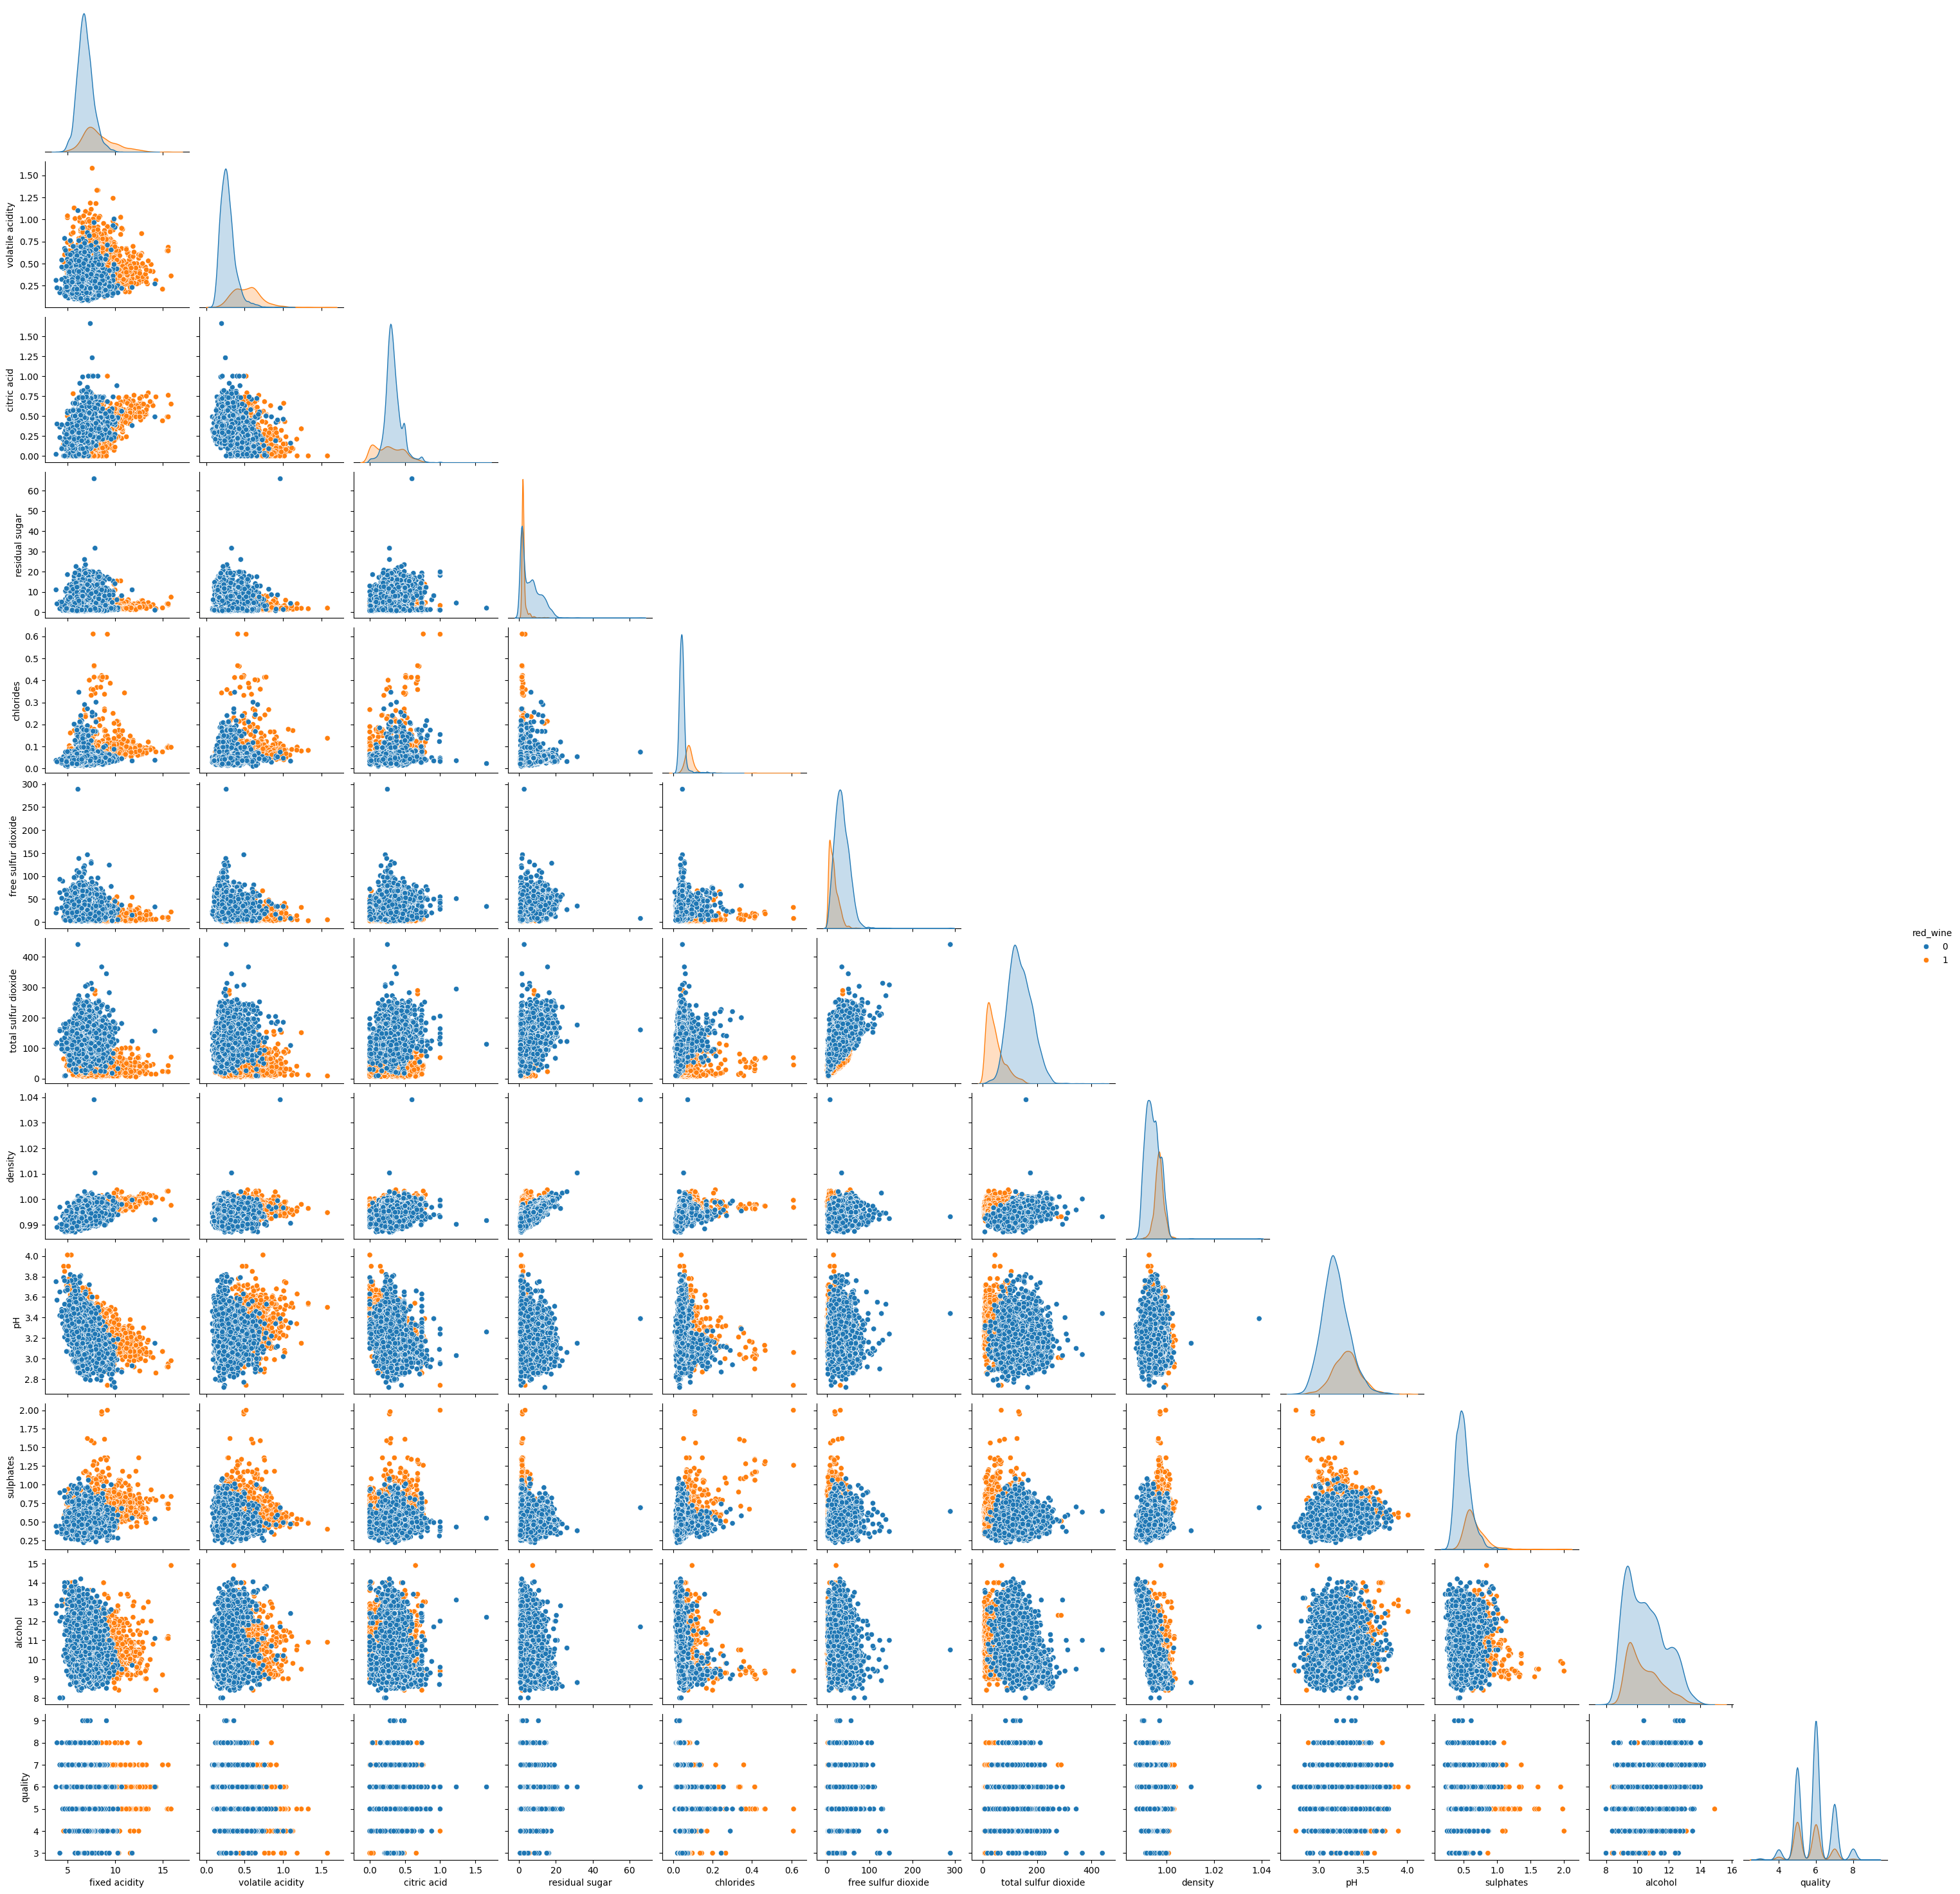

In [6]:
sns.pairplot(df, hue='red_wine', corner=True)
plt.show()

#### How do the dataset features correlate with the target, `red_wine`?

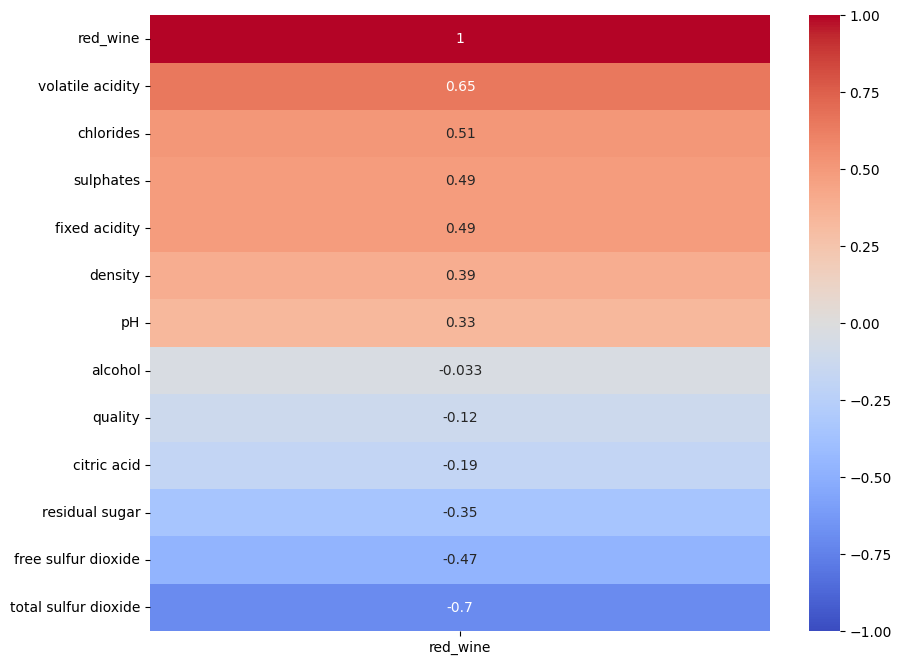

In [7]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(numeric_only=True)[['red_wine']].sort_values(by='red_wine', ascending = False), vmin = -1, vmax = 1, cmap = 'coolwarm', annot = True);

# PART 3: MODELING
Now that your data is clean and you've explored its characteristics, it's time to build and evaluate your models.

- **Establish baseline accuracy score:** Before training any models, establish a baseline accuracy score. This provides a benchmark for evaluating the performance of your models.

- **Train-test-split with `random_state = 42`:** Split your data into training and testing sets using `train_test_split` with a specified random state. This ensures reproducibility in your results.

- **Normalize your data with `StandardScaler`:** Standardize your features using `StandardScaler` to ensure that they are on a similar scale. This step is particularly important for algorithms sensitive to the scale of input features, such as K-Nearest Neighbors.

- **Evaluate K-Nearest Neighbors (KNN):**
  - Set \( k = 5 \) and calculate the training/testing accuracy scores. Explore whether the model performs better with other values of \( k \). <br>
<br>
- **Try Logistic Regression and RandomForestClassifier:**
  - Experiment with alternative models such as Logistic Regression and RandomForestClassifier. Compare their performance against the KNN model to identify the most suitable algorithm for your specific classification task.
  - For each model, include a confusion matrix to assess its performance in terms of true positives, true negatives, false positives, and false negatives.

#### Let's establish a baseline...

In [8]:
df['red_wine'].value_counts(normalize = True)

,proportion
red_wine,
0,0.753886
1,0.246114


We want a model that will have a better accuracy score than $75.4\%$

#### Determine the $X$ and $y$ datasets

In [9]:
X = df.drop(columns = 'red_wine')
y = df['red_wine']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

#### Normalize the data using `StandardScalar()`

In [11]:
sc = StandardScaler()

X_train_sc= sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

#### Instantiate KNN, then fit and evaluate the model.

In [12]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_sc, y_train)

KNeighborsClassifier()

In [13]:
knn.score(X_train_sc, y_train)

0.9944581280788177

In [14]:
knn.score(X_test_sc, y_test)

0.9926153846153846

The model performs quite well!

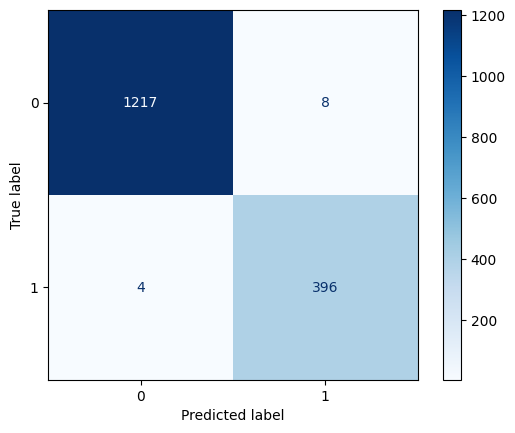

In [15]:
ConfusionMatrixDisplay.from_estimator(knn, X_test_sc, y_test, cmap='Blues');

#### Let's try different values of $k$ to see how the model behaves...

In [16]:
# Create empty list for scores
scores = []

for k in range(3, 31, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_sc, y_train)
    train_score = knn.score(X_train_sc, y_train)
    test_score = knn.score(X_test_sc, y_test)
    scores.append({'k': k, 'train_score': train_score, 'test_score': test_score})
df_scores = pd.DataFrame(scores)
df_scores

,k,train_score,test_score
0,3,0.995690,0.992615
1,5,0.994458,0.992615
2,7,0.994048,0.994462
3,9,0.994048,0.993846
4,11,0.993021,0.992615
5,13,0.992816,0.992615
6,15,0.992816,0.992000
7,17,0.993227,0.992615
8,19,0.993227,0.993231
9,21,0.993432,0.993231


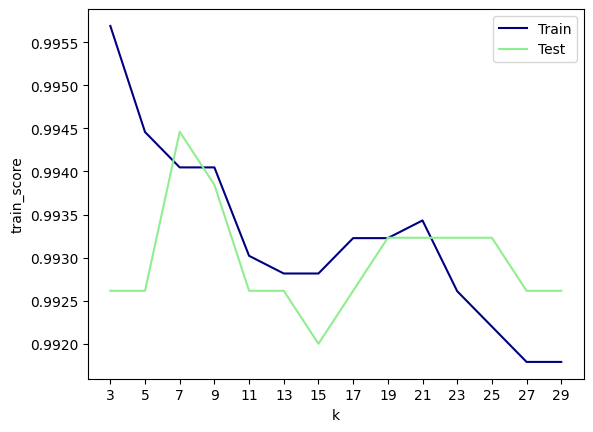

In [17]:
sns.lineplot(data = df_scores, x = 'k', y = 'train_score', c='navy', label='Train');
sns.lineplot(data = df_scores, x = 'k', y = 'test_score', c ='lightgreen', label='Test');
plt.xticks(np.arange(3, 31, 2));

It looks like $k=7$ yields the best test dataset prediction accuracy.  Let's retrain the model with this value of $k$.

In [18]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train_sc, y_train)

KNeighborsClassifier(n_neighbors=7)

In [19]:
knn.score(X_train_sc, y_train)

0.9940476190476191

In [20]:
knn.score(X_test_sc, y_test)

0.9944615384615385

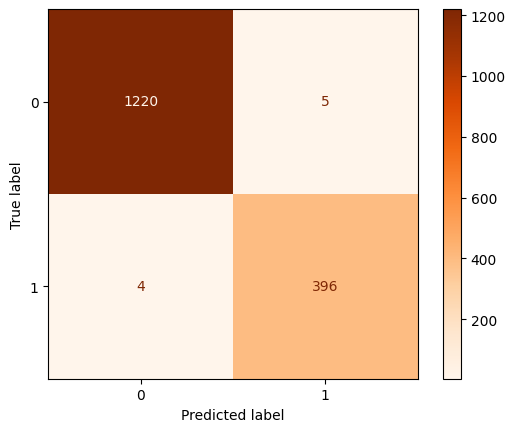

In [21]:
ConfusionMatrixDisplay.from_estimator(knn, X_test_sc, y_test, cmap='Oranges');

## Now let's try Logistic Regression

In [22]:
logr = LogisticRegression()
logr.fit(X_train_sc, y_train)

LogisticRegression()

In [23]:
logr.score(X_train_sc, y_train)

0.9932266009852216

In [24]:
logr.score(X_test_sc, y_test)

0.9956923076923077

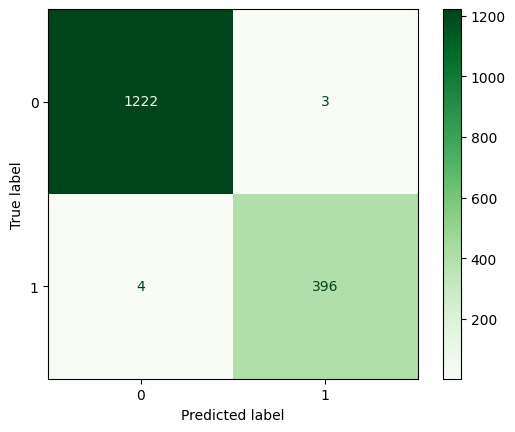

In [25]:
ConfusionMatrixDisplay.from_estimator(logr, X_test_sc, y_test, cmap='Greens');

It appears that the logistic regression model performs a little bit better than knn.

## Now, let's try `RandomForest()`

In [26]:
rf = RandomForestClassifier()
rf.fit(X_train_sc, y_train)

RandomForestClassifier()

In [27]:
rf.score(X_train_sc, y_train)

0.9997947454844006

In [28]:
rf.score(X_test_sc, y_test)

0.9956923076923077

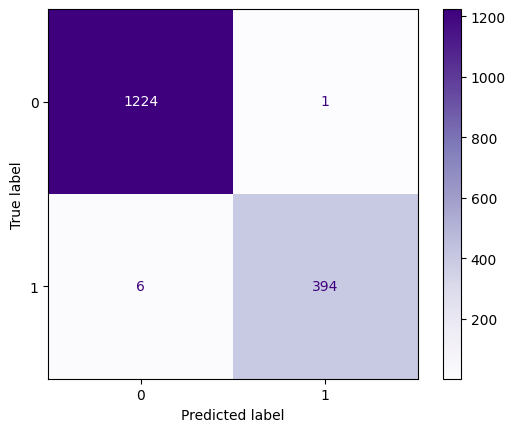

In [29]:
ConfusionMatrixDisplay.from_estimator(rf, X_test_sc, y_test, cmap='Purples');

It looks like Random Forest performs the best of the three models investigated.